##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Essential Guide to Transformer Models

**참고 Link**
  1. [Attention is All You Need (2017)](https://arxiv.org/abs/1706.03762)
  2. [The Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/)
  3. [The Illustrated Transformer(한국어 번역본)](https://nlpinkorean.github.io/illustrated-transformer/)
  4. [Illustrated Guide to Transformers- Step by Step Explanation](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0)
  5. [Transformer: Attention Is All You Need (꼼꼼한 딥러닝 논문 리뷰와 코드 실습)](https://www.youtube.com/watch?v=AA621UofTUA&list=PLRx0vPvlEmdADpce8aoBhNnDaaHQN1Typ&index=8)

<br>

  - 트랜스포머가 논문에서 제안되었다. [Attention is All You Need](https://arxiv.org/abs/1706.03762).
  - Transformers가 자연어 처리 세계를 휩쓸고 있다.
    - 이 놀라운 모델들은 다수의 NLP 기록을 깨고 최신 기술을 발전시키고 있습니다.
    - 다음과 같은 여러 응용 프로그램에 사용됩니다.
        - 기계어 번역
        - 대화 챗봇
        - 구글 검색 엔진

- NLP 밖에서도 컴퓨터 비전과 음악 발전 분야에서 트랜스포머를 찾을 수 있다.
- Fairwell to RNN

  <img src='http://www.mccormickml.com/assets/BERT/BERT_Mountain.png'>

  - [Various Model Architectures of Transformer](https://github.com/huggingface/transformers#model-architectures)

  

# Attention Mechanism

transformers를 이해하기 위해서는 우선 주의 메커니즘을 이해해야 한다.

주의 메커니즘을 통해 transformers는 매우 긴 메모리를 가질 수 있습니다.<br>transformers 모델은 생성된 모든 이전 토큰에 "참석"하거나 "포커스"할 수 있습니다.

<br>
<img src='https://miro.medium.com/max/1050/0*CoVkXTogdhlfjSw_.png'>
<br><br>

<img src='https://miro.medium.com/max/960/0*ODlgeguKzjyzjuuJ.gif'>

<br><br>


## Recurrent neural networks (RNN)의 단점

- 단기 메모리(참조할 더 좁은 창)
이야기가 길어지면, RNN은 이 순서에서 앞서 생성된 단어에 접근할 수 없다.
- 게이트 순환 장치(GRU) 및 LSTM(Long-Short Term Memory) 네트워크의 경우에도 마찬가지입니다.
- RNN은 순차적이다. (병렬 컴퓨팅 없음)

# Attention Mechanism

- 이론적으로 충분한 계산 리소스를 제공하는 주의 메커니즘은 참조할 수 있는 무한한 창을 가지고 있으므로 텍스트를 생성하는 동안 이야기의 전체 컨텍스트를 사용할 수 있습니다.

<br>

<img src = 'https://miro.medium.com/max/960/1*w2OJ4jfjxmlcqu6k4BdgrA.gif'>

<br>

# High-level View of Transformer Architecture

- 먼저 모델을 단일 블랙박스로 살펴보겠습니다.<br> 기계 번역 어플리케이션에서, 그것은 한 언어로 된 문장을 가지고 다른 언어로 그것의 번역을 출력할 것이다.

<img src='https://jalammar.github.io/images/t/the_transformer_3.png'>

- A different view

<img src='https://jalammar.github.io/images/t/The_transformer_encoders_decoders.png'>



- 인코딩 컴포넌트는 인코더 더미입니다. (종이는 6개를 서로 겹쳐 쌓습니다. 숫자 6에는 마법이 없습니다.)

<img src='https://jalammar.github.io/images/t/The_transformer_encoder_decoder_stack.png'>

<img src= 'https://hackernoon.com/_next/image?url=https%3A%2F%2Fcdn.hackernoon.com%2Fimages%2FZ7ZkCzqpkBdXJ4DMKYwft6zCe9q1-3t1235mt.jpeg&w=1920&q=75'>

인코더는 구조가 모두 동일하지만 가중치를 공유하지는 않습니다.<br>
각 층은 두 개의 하위 층으로 나뉩니다.

<img src='https://jalammar.github.io/images/t/Transformer_encoder.png'>

- 높은 수준에서 인코더는 입력 시퀀스를 해당 입력의 모든 학습된 정보를 저장하는 추상적인 연속 표현으로 매핑합니다.

- 디코더에는 두 개의 층이 있지만, 그 사이에는 디코더가 입력 문장의 관련 부분에 집중할 수 있도록 도와주는 주의 계층이 있습니다.

<img src='https://jalammar.github.io/images/t/Transformer_decoder.png'>

- 그런 다음 높은 수준에서 디코더는 연속 표현을 취하고 단계별로 이전 출력도 공급받으면서 단일 출력을 생성합니다.



## Detailed Look

<img src='https://i.stack.imgur.com/eAKQu.png'>

## Detailed View of Transformer Architecture

```
대화형 챗봇에서 이 기능이 어떻게 작동하는지 보여드리겠습니다.

입력: "안녕하세요"
트랜스포머 출력: "괜찮습니다."
```
### Input Embeddings
첫 번째 단계는 입력 정보를 단어 임베딩 계층에 제공하는 것입니다.

<img src= 'https://miro.medium.com/max/437/0*6MnniQMOBPu4kFq3.png'>

### Positional Encoding

참고 Link: 

[1. Transformer Architecture: The Positional Encoding](https://kazemnejad.com/blog/transformer_architecture_positional_encoding/)

[2. Master Positional Encoding, Part 1](https://towardsdatascience.com/master-positional-encoding-part-i-63c05d90a0c3)

다음 단계는 위치 정보를 임베딩에 주입하는 것입니다.

<img src='https://d33wubrfki0l68.cloudfront.net/a76be57763d942798f8081b77edf8f078720cd45/bd31a/img/transformer_architecture_positional_encoding/model_arc.jpg'>

- 단어의 위치와 순서는 모든 언어의 필수적인 부분이다.
    - 문법과 문장의 실제 의미를 정의한다.

- 순환 신경 네트워크(RNN)는 본질적으로 단어 순서를 고려한다.
    - 순차적으로 문장을 낱말 단위로 파싱한다.

- 그러나 트랜스포머 아키텍처는 다중 헤드 자기 주의 메커니즘을 위해 반복 메커니즘을 제거했다.
    - RNN의 재발 방법을 피하면 훈련 시간에 엄청난 속도가 빨라질 것이다.
    - 그리고 이론적으로, 그것은 문장에서 더 긴 의존성을 포착할 수 있다.

- 문장의 각 단어가 트랜스포머의 인코더/디코더 스택을 동시에 통과하기 때문에 모델 자체에는 각 단어에 대한 위치/순서가 없습니다.
    - 따라서, 단어의 순서를 우리 모델에 통합하는 방법이 여전히 필요합니다.

- 모델에 어느 정도 질서감을 주는 하나의 가능한 해결책은 문장에서의 각 단어에 그것의 위치에 대한 정보의 조각을 추가하는 것이다. 우리는 이것을 "정보의 조각", 위치 부호화라고 부른다. 
    - positional encoding을 사용하여 수행됩니다. 저자들은 sin, cos 함수를 이용한 영리한 묘기를 생각해 냈다.

<img src='https://miro.medium.com/max/1050/0*PuV87IVkFin98EZW.png'>

<img src='https://jalammar.github.io/images/t/transformer_positional_encoding_vectors.png'>

<img src='https://jalammar.github.io/images/t/transformer_positional_encoding_example.png'>

<img src='https://jalammar.github.io/images/t/transformer_positional_encoding_large_example.png'>


### Encoder Layer

<img src='https://miro.medium.com/max/846/0*gxx0-uUpZfAmKmPa.png'>

- 인코더 레이어 작업은 모든 입력 시퀀스를 해당 시퀀스 전체에 대해 학습된 정보를 보유하는 추상 연속 표현으로 매핑하는 것입니다.
- 여기에는 2개의 서브모듈, 다중 헤드 어텐션, 그리고 완전히 연결된 네트워크가 포함되어 있습니다.

<img src='https://hackernoon.com/_next/image?url=https%3A%2F%2Fcdn.hackernoon.com%2Fimages%2FZ7ZkCzqpkBdXJ4DMKYwft6zCe9q1-bx1e35i5.jpeg&w=1920&q=75'>

- 2개의 서브레이어 주변에는 층 정규화에 따른 잔여 연결부도 있습니다.
- 잔여 연결부는 '스킵 연결부'와 동일합니다. 이러한 구배는 비선형 활성화 함수를 통과하지 않고 네트워크를 통해 직접 흐를 수 있도록 하기 위해 사용됩니다.
- 계층 정규화는 네트워크를 안정화시키기 위해 사용되므로 필요한 교육 시간이 상당히 단축됩니다.


### Data Flow

- 인코더 블록은 입력이 $S\times D$ 형태일 것으로 예상한다.
- $S$ = 문장 길이
- $D$ = 네트워크에서 가중치를 훈련할 수 있는 임베딩의 치수.
- 입력 및 출력 형태가 동일하다는 점에 유의하십시오.

<img src='https://hackernoon.com/_next/image?url=https%3A%2F%2Fcdn.hackernoon.com%2Fimages%2FZ7ZkCzqpkBdXJ4DMKYwft6zCe9q1-lu1s35gs.jpeg&w=1920&q=75'>

### Multi-Headed Attention

- 인코더의 다중 헤드 주의는 자기 주의라고 하는 특정 주의 메커니즘을 적용한다.

- 모델은 self 어텐션을 통해 입력에서 각 단어를 다른 단어와 연결할 수 있습니다.

- 따라서 이 예제에서 모델은 "you"이라는 단어를 "how" 및 "are"와 연결하는 방법을 배울 수 있습니다.
- 또한 모델은 이러한 패턴으로 구성된 단어가 일반적으로 질문임을 학습하므로 적절하게 응답할 수 있습니다.

<img src = 'https://miro.medium.com/max/669/0*mupwYy99Watj1GJT.png'>

<br>

### Self-Attention Layer


<img src= 'https://pbs.twimg.com/media/Et1JSjMVEAAGgLT?format=png&name=900x900'>

<br>
<br>
<img src='https://hackernoon.com/_next/image?url=https%3A%2F%2Fcdn.hackernoon.com%2Fimages%2FZ7ZkCzqpkBdXJ4DMKYwft6zCe9q1-762235qa.jpeg&w=3840&q=75'>

- self-attention layer 는 Q는 쿼리($W_Q$), 키($W_K$), 값($W_V$)_의 3가지 가중치 매트릭스로 초기화됩니다.
- 각 매트릭스의 크기는 $D\times d$이며, 여기서 $d$는 "Attention is your need"라는 논문에서 64로 간주된다.

- step 0: (그림의 Calc 1), 입력에 쿼리, 키, 값 행렬을 곱하여 행렬 Q, K, V를 만든다.
<br>
      $$Q=X\cdot W_Q$$ 
      $$K=X\cdot W_K$$
      $$V=X\cdot W_V$$

- step 1: $Q$에 $K^T$를 곱하여 점수 행렬을 계산합니다.
<br>
$$ \text{Attention Score} = Q\cdot K^T, \text{dim} = S\times S  $$

- 점수 매트릭스는 단어를 다른 단어에 얼마나 집중해야 하는지를 결정합니다.
- 그래서 각 단어는 시간 단계의 다른 단어에 해당하는 점수를 가집니다. 점수가 높을수록 집중력이 높아집니다. 이렇게 하면 쿼리가 키에 매핑됩니다.

- step 2: \sqrt d$를 나누어 위의 주의 점수 매트릭스를 축소합니다.

- step 3: 스케일링된 주의 점수에 소프트맥스 기능을 적용합니다.
<br>
$$\text{softmax} \bigg(\frac {Q\cdot K^T}{\sqrt d} \bigg)$$

- step 4: 소프트맥스 출력과 값 벡터 V를 곱하여 출력 벡터를 구합니다.

$$S = D(Q,K,V) = \text{softmax} \bigg(\frac {Q\cdot K^T}{\sqrt d} \bigg)\cdot V, \text {dim} = S \times d$$

- 소프트맥스 점수가 높을수록 모델이 학습하는 단어의 가치가 유지됩니다.
- 점수가 낮으면 관련 없는 단어가 빠져 버릴 것이다.
그리고 나서 그 결과물을 처리할 선형 레이어에 공급합니다.

### Query, Key, and Value Vectors

To achieve self-attention, 우리는 3개의 완전히 연결된 계층에 입력을 공급하여 쿼리, 키 및 값 벡터를 만든다.
이 벡터들은 정확히 무엇입니까?

I found a [good explanation on stack exchange](https://stats.stackexchange.com/questions/421935/what-exactly-are-keys-queries-and-values-in-attention-mechanisms) stating….

> 쿼리 키와 값 개념은 검색 시스템에서 가져옵니다.
>
> 예를 들어, 유튜브에서 일부 동영상을 검색하기 위해 쿼리를 입력하면 검색 엔진은 데이터베이스의 후보 동영상과 연결된 키 집합(비디오 제목, 설명 등)에 대해 쿼리를 매핑한 다음 가장 적합한 동영상(값)을 제공합니다.
>

### Step by Step Detailed Guide

  - Step 0: 입력에 쿼리, 키 및 값 행렬을 곱하여 행렬 Q, K, V를 계산합니다.
respective Query, Key, and Value matrix.

      $$Q=X\cdot W_Q$$ 
      $$K=X\cdot W_K$$
      $$V=X\cdot W_V$$

  - Step 1: $Q$ with $K^T$를 곱하여 점수 행렬을 계산한다.

      $$ \text{Attention Score} = Q\cdot K^T, \text{dim} = S\times S  $$

    <img src= 'https://miro.medium.com/max/960/1*kxR_DjBgFw7LTTN-Ut34Pw.gif'>

    <img src ='https://miro.medium.com/max/675/0*D8GA7_DsjTfudI0-.png'>

<br>

    - 각 단어는 시간 단계의 다른 단어에 해당하는 점수를 가집니다.
    - 점수가 높을수록 집중력이 높아집니다. 이렇게 하면 쿼리가 키에 매핑됩니다.

  - Step 2: 위의 attention 점수 매트릭스를 $\sqrt d$로 나누어 축소한다.

    <img src='https://miro.medium.com/max/716/0*VKdRa5TC6jJmKZ-0.png'>

  - Step 3: softmax 기능을 스케일링된 attention score에 적용

      $$\text{softmax} \bigg(\frac {Q\cdot K^T}{\sqrt d} \bigg)$$

    <img src='https://miro.medium.com/max/1050/0*qSKUxncfQVhUJeCr.png'>

  - Step 4: 소프트맥스 출력과 값 벡터 V를 곱하면 출력 벡터를 얻을 수 있습니다.

      $$S = D(Q,K,V) = \text{softmax} \bigg(\frac {Q\cdot K^T}{\sqrt d} \bigg)\cdot V, \text {dim} = S \times d$$

      <img src='https://miro.medium.com/max/951/0*dv4q_I1gubq2xua1.png'>

    - 소프트맥스 점수가 높을수록 모델이 학습하는 단어의 가치가 유지됩니다.
    - 점수가 낮으면 관련 없는 단어가 빠져 버릴 것이다.
    - 그리고 나서 그 결과물을 처리할 선형 레이어에 공급합니다.
  


### Computing Multi-headed Attention

Multi-head Attention은 Attention 메커니즘을 여러 번 병렬로 실행하는 Attention 메커니즘을 위한 모듈입니다. <br>
그런 다음 독립Attention 출력이 연결되고 예상 차원으로 선형 변환된다.<br>
직관적으로, multiple attention heads는 시퀀스의 일부(e.g. : 장기 의존성 대 단기 의존성)에 다르게 주의를 기울일 수 있다.

<img src='https://production-media.paperswithcode.com/methods/multi-head-attention_l1A3G7a.png'>

<img src ='https://jalammar.github.io/images/t/transformer_attention_heads_qkv.png'>

  <img src='https://jalammar.github.io/images/t/transformer_attention_heads_z.png'>

<img src='https://jalammar.github.io/images/t/transformer_attention_heads_weight_matrix_o.png'>

<img src='https://jalammar.github.io/images/t/transformer_multi-headed_self-attention-recap.png'>

<img src='https://jalammar.github.io/images/t/transformer_self-attention_visualization_2.png'>



잔류 연결, 계층 표준화 및 피드 포워드 네트워크
- multi-headed attention 출력 벡터는 원래 위치 입력 임베딩에 추가된다. 이를 residual connection.이라고 합니다.

- residual connection.의 출력은  layer normalization.를 거칩니다.

<img src = 'https://miro.medium.com/max/960/0*RRWR2BsH5SQgMGo3.gif'>

- normalized residual 출력은 추가 처리를 위해 점별 feed-forward 네트워크를 통해 투영됩니다.
- 점별 feed-forward 네트워크는 ReLU 활성화가 중간에 있는 두 개의 선형 레이어입니다.
- 그 다음, 그 출력은 점별 feed-forward 네트워크의 입력에 다시 추가되고 더욱 정규화됩니다.

<img src='https://miro.medium.com/max/960/0*-fdpoPbN-BHAMRnr.gif'>

- residual connections는 경사가 네트워크를 통해 직접 흐를 수 있게 함으로써 네트워크 교육에 도움이 됩니다.
- 계층 정규화는 네트워크를 안정화시키기 위해 사용되므로 필요한 교육 시간이 상당히 단축됩니다.
- 점별 feed-forward layer은 잠재적으로 더 풍부한 표현을 제공하는 attention 출력을 투영하는 데 사용됩니다.

### Decoder Layer

- 디코더의 역할은 텍스트 시퀀스를 생성하는 것입니다.
- 디코더는 인코더와 유사한 하위 계층을 가지고 있습니다.
    - 두 개의  multi-headed attention layers, pointwise feed-forward layer, residual connections 및 각 하위 계층 이후의 layer normalization를 가지고 있습니다.
    - 이 서브 레이어는 인코더의 레이어와 비슷하게 동작하지만 각 multi-headed attention layer는 다른 역할을 합니다.
- 디코더는 분류기 역할을 하는 선형 레이어와 단어 확률을 얻기 위한 소프트맥스로 차단됩니다.
 <img src = 'https://miro.medium.com/max/3600/0*bXI7F0OiEtbtyy3k.png'>

 - 디코더는 autoregressive이며, 시작 토큰으로 시작하며, 입력으로부터 attention 정보를 포함하는 인코더 출력뿐만 아니라 이전 출력의 목록을 입력으로 받아들입니다. 토큰을 출력으로 생성할 때 디코더는 디코딩을 중지합니다.

 <img src = 'https://miro.medium.com/max/720/0*u8nSpT8Z8ITwzNLV.gif'>

### Decoder Input Embeddings & Positional Encoding

- 디코더의 시작은 인코더와 거의 같습니다.
- 입력은 임베딩 계층과 위치 인코딩 계층을 거칩니다.
positional embeddings은 디코더 입력에 대한 attention scores를 계산하는 첫 번째 multi-head attention layer에 공급된다.

### Decoders First Multi-Headed Attention

- 이 multi-headed attention layer는 약간 다르게 작동합니다.
- 디코더는 autoregressive이며 단어별로 시퀀스 워드를 생성하므로 미래의 토큰에 대한 조건화를 방지해야 합니다.
- 예) "am"의 주의 점수를 계산할 때, "fine"이라는 단어는 이후에 생성된 미래 단어이기 때문에 "fine"이라는 단어에 접근해서는 안 됩니다.
- "am"이라는 단어는 자신과 그 앞의 단어에만 접근할 수 있어야 합니다. 이것은 그들이 이전 단어에만 주의를 기울일 수 있는 다른 모든 단어에 적용된다.

<img src = 'https://miro.medium.com/max/818/0*0pqSkWgSPZYr_Sjx.png'>

- 미래 단어에 대한 attention scores를 계산하는 방법이 필요합니다.
- 이 방법을 __masking_이라고 합니다.
- 디코더가 미래 토큰을 보지 못하게 하려면 __앞을 내다보는 mask__를 적용_
- softmax 계산 전, 점수 스케일링 후 mask가 __추가됩니다.

### Look-Ahead Mask

  - 마스크는 0과 음의 부정의 값으로 채워진 attention scores와 같은 크기의 행렬입니다. 
  - 여러분이 확대된 attention scores에 마스크를 더하면, 여러분은 오른쪽 위의 삼각형이 부정 부정사로 채워진 점수의 행렬을 얻게 됩니다.

  <img src ='https://miro.medium.com/max/1050/0*QYFua-iIKp5jZLNT.png'>

  - 마스크의 이유는 일단 마스크된 점수의 소프트맥스를 취하면 음의 부정사가 0이 되고 이후 토큰에 대한 주의점수가 0이 되기 때문이다.
  - 아래 그림에서 볼 수 있듯이, "am"에 대한 attention scores는 자신과 그 앞에 있는 모든 단어에 대한 값을 가지지만 "fine"이라는 단어에 대해서는 0입니다. 이것은 본질적으로 모델이 이러한 단어에 초점을 두지 말라는 것을 말해준다.

  <img src = 'https://miro.medium.com/max/1050/0*3ykVCJ9okbgB0uUR.png'>

  - 이 마스킹은 첫 번째 다중 헤드 주의 계층에서 주의 점수를 계산하는 방법의 유일한 차이이다. 
  - 이 레이어는 추가 처리를 위해 선형 레이어를 통해 연결되고 공급되기 전에 마스크가 적용되고 있는 여러 헤드를 가지고 있습니다. 
  - 첫 번째  multi-headed attention의 출력은 모델이 디코더 입력에 어떻게 참여해야 하는지에 대한 정보를 포함하는 마스킹된 출력 벡터입니다.

  <img src='https://miro.medium.com/max/1050/0*4Qos9ymoz4LW1pmP.png'>

### Decoder Second Multi-Headed Attention, and Point-wise Feed Forward Layer

  - 두 번째 multi-headed attention layer의 경우, 인코더의 출력은 쿼리와 키이며, 첫 번째 multi-headed attention layer 출력은 값입니다. 
    - 이 프로세스는 인코더의 입력과 디코더의 입력이 일치하므로 디코더가 초점을 맞출 인코더 입력이 적절한지 결정할 수 있습니다. 
  - 두 번째 Multi-Headed Attention의 출력은 추가 처리를 위해 Point-wise Feed Forward Layer를 거칩니다.

### Linear Classifier and Final Softmax for Output Probabilities

  - 최종 pointwise feedforward layer의 출력은 분류자 역할을 하는 최종 linear layer를 거친다. 
  - 분류기는 당신이 가지고 있는 수업의 수만큼 크다. 
    - 예를 들어, 10,000개의 단어에 대해 10,000개의 클래스가 있는 경우 해당 클래스어의 출력은 10,000 사이즈가 됩니다. 
  분류기의 출력은 softmax 레이어로 공급되며, softmax 레이어는 0과 1 사이의 확률 점수를 산출한다. 
    - __우리는 가장 높은 확률 점수의 지수를 취하는데, 그것은 우리가 예측한 단어와 같습니다__.

    <img src= 'https://miro.medium.com/max/924/0*1OyVUO-s-uBh8EV2.png'>

  - 그런 다음 디코더는 출력을 가져와서 디코더 입력 목록에 추가한 다음 토큰이 예측될 때까지 다시 디코딩을 계속합니다. 
    - 본 사례에서 가장 높은 확률 예측은 엔드 토큰에 할당된 최종 클래스입니다.

  - 디코더는 또한 N개의 레이어를 높게 쌓을 수 있으며, 각 레이어는 인코더와 그 이전의 레이어로부터 입력을 받아들인다. 
    - 레이어를 쌓음으로써 모델은 어텐션 헤드에서 다양한 어텐션 조합을 추출하고 집중하는 방법을 배울 수 있어 예측력을 높일 수 있습니다.

    <img src='https://miro.medium.com/max/1050/0*e6ZYxwBRleLgzfw8.png'>


바로 그거예요!

  - 트랜스포머는 주의 메커니즘의 힘을 활용하여 더 나은 예측을 합니다. 
  -반복신경망은 비슷한 것을 성취하려고 노력하지만 단기 기억력에 시달리기 때문이다. 
  - 특히 긴 시퀀스를 인코딩하거나 생성하고자 할 때 트랜스포머가 더 나을 수 있습니다. 
  -  transformer architecture로 인해 자연어 처리 산업은 전례 없는 결과를 얻을 수 있습니다.

# Coding Practice

이 튜토리얼에서는 포르투갈어를 영어로 번역하기 위한 <a href="https://arxiv.org/abs/1706.03762" class="external">Transformer 모델</a>을 교육합니다. 이것은 텍스트 생성(text_generation.ipynb) 및 주의(nmt_with_attention.ipynb)에 대한 지식을 가정한 고급 예제입니다.

Transformer 모델의 핵심 아이디어는 *self-attention*입니다. __즉, 입력 시퀀스의 다른 위치를 파악하여 해당 시퀀스의 표현을 계산하는 기능입니다.__ Transformer는 self-attention layers 스택을 만들고 아래 __스케일된 닷 제품 어텐션__ 및 __Multi-head attention__ 절에서 설명합니다.

transformer model델은 RNN 또는 CNN 대신 self-attention layers 스택을 사용하여 가변 크기 입력을 처리한다. 이 일반 아키텍처는 다음과 같은 여러 가지 장점을 가지고 있습니다.

* 데이터 전체의 시간적/공간적 관계에 대한 가정을 하지 않습니다. 
* 레이어 출력은 RNN과 같은 시리즈 대신 병렬로 계산할 수 있습니다.
* 원거리 항목은 많은 RNN 단계 또는 컨볼루션 레이어를 통과하지 않고 서로의 출력에 영향을 미칠 수 있다(예: [Scene Memory Transformer](https://arxiv.org/pdf/1903.03878.pdf) 참조).
* 장기적인 의존성을 학습할 수 있습니다. 이것은 많은 시퀀스 작업에서 어려운 과제이다.

이 아키텍처의 단점은 다음과 같습니다.

* 시계열의 경우 시간 단계의 출력은 입력과 현재 숨김 상태 대신 *입력 내역*에서 계산됩니다. 이것은 덜 효율적일 수 있다.   
* 입력 *does*가 텍스트와 같은 시간적/공간적 관계를 가지고 있는 경우, 일부 위치 인코딩을 추가해야 합니다. 그렇지 않으면 모델에서 단어 모음을 효과적으로 볼 수 있습니다. 

이 노트북에서 모델을 교육한 후에는 포르투갈어 문장을 입력하고 영어 번역을 반환할 수 있습니다.

<img src="https://www.tensorflow.org/images/tutorials/transformer/attention_map_portuguese.png" width="800" alt="Attention heatmap">

In [3]:
!pip install -q tfds-nightly

# Pin matplotlib version to 3.2.2 since in the latest version
# transformer.ipynb fails with the following error:
# https://stackoverflow.com/questions/62953704/valueerror-the-number-of-fixedlocator-locations-5-usually-from-a-call-to-set
!pip install matplotlib==3.2.2

In [5]:
import tensorflow_datasets as tfds
import tensorflow as tf
import time
import numpy as np
import matplotlib.pyplot as plt

## Setup input pipeline

[TFDS](https://www.tensorflow.org/datasets)를 사용하여 [TED Talks Open Translation Project](https://www.ted.com/participate/translate))에서 [포르투갈어-영어 번역 데이터 세트](https://github.com/neulab/word-embeddings-for-nmt)를 로드합니다.

이 데이터 세트에는 약 50000개의 교육 예제, 1100개의 검증 예제 및 2000개의 테스트 예가 포함되어 있습니다.

In [6]:
examples, metadata = tfds.load('ted_hrlr_translate/pt_to_en', with_info=True,
                               as_supervised=True)
train_examples, val_examples = examples['train'], examples['validation']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/51785 [00:00<?, ? examples/s]

Shuffling ted_hrlr_translate-train.tfrecord...:   0%|          | 0/51785 [00:00<?, ? examples/s]

Generating validation examples...:   0%|          | 0/1193 [00:00<?, ? examples/s]

Shuffling ted_hrlr_translate-validation.tfrecord...:   0%|          | 0/1193 [00:00<?, ? examples/s]

Generating test examples...:   0%|          | 0/1803 [00:00<?, ? examples/s]

Shuffling ted_hrlr_translate-test.tfrecord...:   0%|          | 0/1803 [00:00<?, ? examples/s]

Dataset ted_hrlr_translate downloaded and prepared to /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0. Subsequent calls will reuse this data.


training dataset에서 사용자 지정 하위 단어 토큰나이저를 만듭니다.

In [18]:
tokenizer_en = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    (en.numpy() for pt, en in train_examples), target_vocab_size=2**13)

tokenizer_pt = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    (pt.numpy() for pt, en in train_examples), target_vocab_size=2**13)

In [19]:
sample_string = 'Transformer is awesome.'

tokenized_string = tokenizer_en.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer_en.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

assert original_string == sample_string

Tokenized string is [7915, 1248, 7946, 7194, 13, 2799, 7877]
The original string: Transformer is awesome.


토큰나이저는 해당 단어가 사전에 없는 경우 문자열을 하위 워드로 구분하여 인코딩합니다.

In [20]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer_en.decode([ts])))

7915 ----> T
1248 ----> ran
7946 ----> s
7194 ----> former 
13 ----> is 
2799 ----> awesome
7877 ----> .


In [21]:
BUFFER_SIZE = 20000
BATCH_SIZE = 64

입력 및 대상에 시작 및 종료 토큰을 추가합니다.

In [22]:
def encode(lang1, lang2):
  lang1 = [tokenizer_pt.vocab_size] + tokenizer_pt.encode(
      lang1.numpy()) + [tokenizer_pt.vocab_size+1]

  lang2 = [tokenizer_en.vocab_size] + tokenizer_en.encode(
      lang2.numpy()) + [tokenizer_en.vocab_size+1]
  
  return lang1, lang2

`Dataset.map`을 사용하여 데이터 집합의 각 요소에 이 함수를 적용하려고 합니다.  `Dataset.map`은 그래프 모드에서 실행됩니다.

* 그래프 텐서는 값이 없습니다. 
* 그래프 모드에서는 TensorFlow Ops와 함수만 사용할 수 있습니다. 

따라서 이 함수를 직접 '.map'할 수 없습니다. tf.py_function으로 포장해야 한다. tf.py_function은 일반 텐서(값과 .numpy` 메서드가 있는)를 랩핑된 파이썬 함수로 전달합니다.

In [23]:
def tf_encode(pt, en):
  result_pt, result_en = tf.py_function(encode, [pt, en], [tf.int64, tf.int64])
  result_pt.set_shape([None])
  result_en.set_shape([None])

  return result_pt, result_en

참고: 이 예제를 작고 비교적 빠르게 유지하려면 토큰 길이가 40개가 넘는 예제를 삭제하십시오.

In [13]:
MAX_LENGTH = 40

In [24]:
def filter_max_length(x, y, max_length=MAX_LENGTH):
  return tf.logical_and(tf.size(x) <= max_length,
                        tf.size(y) <= max_length)

In [25]:
train_dataset = train_examples.map(tf_encode)
train_dataset = train_dataset.filter(filter_max_length)
# 데이터를 메모리에 캐시하여 읽는 동안 속도를 높일 수 있습니다.
train_dataset = train_dataset.cache()
train_dataset = train_dataset.shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE)
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)


val_dataset = val_examples.map(tf_encode)
val_dataset = val_dataset.filter(filter_max_length).padded_batch(BATCH_SIZE)

In [26]:
pt_batch, en_batch = next(iter(val_dataset))
pt_batch, en_batch

(<tf.Tensor: shape=(64, 38), dtype=int64, numpy=
 array([[8214,  342, 3032, ...,    0,    0,    0],
        [8214,   95,  198, ...,    0,    0,    0],
        [8214, 4479, 7990, ...,    0,    0,    0],
        ...,
        [8214,  584,   12, ...,    0,    0,    0],
        [8214,   59, 1548, ...,    0,    0,    0],
        [8214,  118,   34, ...,    0,    0,    0]])>,
 <tf.Tensor: shape=(64, 40), dtype=int64, numpy=
 array([[8087,   98,   25, ...,    0,    0,    0],
        [8087,   12,   20, ...,    0,    0,    0],
        [8087,   12, 5453, ...,    0,    0,    0],
        ...,
        [8087,   18, 2059, ...,    0,    0,    0],
        [8087,   16, 1436, ...,    0,    0,    0],
        [8087,   15,   57, ...,    0,    0,    0]])>)

## Positional encoding

Since this model doesn't contain any recurrence or convolution, positional encoding is added to give the model some information about the relative position of the words in the sentence. 
## 위치 인코딩

이 모델에는 반복이나 컨볼루션이 없으므로 모델에게 문장 내 단어의 상대적 위치에 대한 정보를 제공하기 위해 위치 인코딩이 추가됩니다. 

positional encoding vector는 embedding vector에 추가됩니다. 임베딩은 의미가 비슷한 토큰이 서로 더 가까운 d차원 공간에서 토큰을 나타낸다. 그러나 임베딩은 문장에서 단어의 상대적 위치를 인코딩하지 않는다. 따라서 positional encoding을 추가한 후 단어들은 d차원 공간에서의 *의미 및 문장에서의 위치 유사성*에 기초하여 서로 더 가까워질 것이다.

[positional encoding](https://github.com/tensorflow/examples/blob/master/community/en/position_encoding.ipynb)에 대한 자세한 내용은 노트북을 참조하십시오. 위치 인코딩을 계산하는 공식은 다음과 같습니다.

$$\Large{PE_{(pos, 2i)} = sin(pos / 10000^{2i / d_{model}})} $$
$$\Large{PE_{(pos, 2i+1)} = cos(pos / 10000^{2i / d_{model}})} $$

In [27]:
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

In [28]:
def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
  
  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
  pos_encoding = angle_rads[np.newaxis, ...]
    
  return tf.cast(pos_encoding, dtype=tf.float32)

(1, 50, 512)


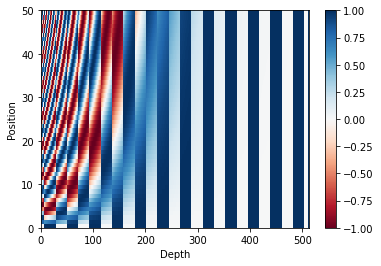

In [29]:
pos_encoding = positional_encoding(50, 512)
print (pos_encoding.shape)

plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

# Masking

시퀀스 배치에서 모든 패드 토큰을 마스킹합니다. 

이렇게 하면 모델이 패딩을 입력으로 처리하지 않습니다. 

마스크는 패드 값 '0'이 있는 위치를 나타냅니다.

 이 위치에는 '1'을 출력하고, 그렇지 않으면 '0'을 출력합니다.

In [30]:
def create_padding_mask(seq):
  seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
  
  # add extra dimensions to add the padding
  # to the attention logits.
  return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

In [31]:
x = tf.constant([[7, 6, 0, 0, 1], [1, 2, 3, 0, 0], [0, 0, 0, 4, 5]])
create_padding_mask(x)

<tf.Tensor: shape=(3, 1, 1, 5), dtype=float32, numpy=
array([[[[0., 0., 1., 1., 0.]]],


       [[[0., 0., 0., 1., 1.]]],


       [[[1., 1., 1., 0., 0.]]]], dtype=float32)>

look-ahead mask는 미래 토큰을 순차적으로 마스크하는 데 사용됩니다. 즉, 마스크는 사용하지 않아야 하는 항목을 나타냅니다.

이것은 세 번째 단어를 예측하기 위해서 첫 번째와 두 번째 단어만 사용한다는 것을 의미합니다.

 네 번째 단어를 예측하는 것과 비슷하게, 첫 번째, 두 번째, 세 번째 단어만 사용됩니다.

In [32]:
def create_look_ahead_mask(size):
  mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
  return mask  # (seq_len, seq_len)

In [33]:
x = tf.random.uniform((1, 3))
temp = create_look_ahead_mask(x.shape[1])
temp

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]], dtype=float32)>

# Scaled dot product attention

<img src="https://www.tensorflow.org/images/tutorials/transformer/scaled_attention.png" width="500" alt="scaled_dot_product_attention">

 transformer에서 사용하는 attention function는 Q (query), K (key), V (value).의 세 가지 입력을 사용합니다. attention weights를 계산하는 데 사용되는 방정식은 다음과 같다.

$$\Large{Attention(Q, K, V) = softmax_k(\frac{QK^T}{\sqrt{d_k}}) V} $$

dot-product attention은 깊이의 제곱근 배수로 확장됩니다. 이는 깊이 값이 클 경우 점곱이 작은 기울기를 갖는 소프트맥스 함수를 밀어 매우 단단한 소프트맥스를 만들기 때문에 이루어진다.

예를 들어, 'Q'와 'K'의 평균이 0이고 분산이 1이라고 가정하자. 행렬 곱셈의 평균은 0이고 분산은 'dk'이다. 따라서 'Q'와 'K'의 매물은 평균이 0이고 분산이 1이어야 하고, 연맥스가 더 부드러워지기 때문에 dk의 제곱근은 (다른 숫자가 아닌) 스케일링에 사용된다.

마스크에 -1e9(음수 무한대에 가까움)를 곱합니다. 마스크가 Q와 K의 스케일 매트릭스 곱셈과 합산되고 소프트맥스 바로 앞에 적용되기 때문에 이 작업이 수행됩니다. 목표는 이러한 셀을 0으로 만드는 것이며, softmax에 대한 큰 음의 입력은 출력에서 거의 0에 가깝다.

In [34]:
def scaled_dot_product_attention(q, k, v, mask):
  """Calculate the attention weights.
  q, k, v must have matching leading dimensions.
  k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.
  The mask has different shapes depending on its type(padding or look ahead) 
  but it must be broadcastable for addition.
  
  Args:
    q: query shape == (..., seq_len_q, depth)
    k: key shape == (..., seq_len_k, depth)
    v: value shape == (..., seq_len_v, depth_v)
    mask: Float tensor with shape broadcastable 
          to (..., seq_len_q, seq_len_k). Defaults to None.
    
  Returns:
    output, attention_weights
  """

  matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)
  
  # scale matmul_qk
  dk = tf.cast(tf.shape(k)[-1], tf.float32)
  scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

  # add the mask to the scaled tensor.
  if mask is not None:
    scaled_attention_logits += (mask * -1e9)  

  # softmax is normalized on the last axis (seq_len_k) so that the scores
  # add up to 1.
  attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)

  output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

  return output, attention_weights

In [35]:
def print_out(q, k, v):
  temp_out, temp_attn = scaled_dot_product_attention(
      q, k, v, None)
  print ('Attention weights are:')
  print (temp_attn)
  print ('Output is:')
  print (temp_out)

In [36]:
np.set_printoptions(suppress=True)

temp_k = tf.constant([[10,0,0],
                      [0,10,0],
                      [0,0,10],
                      [0,0,10]], dtype=tf.float32)  # (4, 3)

temp_v = tf.constant([[   1,0],
                      [  10,0],
                      [ 100,5],
                      [1000,6]], dtype=tf.float32)  # (4, 2)

# 이 쿼리는 두 번째 키와 일치한다.
# 그래서 두 번째 '값'이 반환된다.
temp_q = tf.constant([[0, 10, 0]], dtype=tf.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor([[0. 1. 0. 0.]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[10.  0.]], shape=(1, 2), dtype=float32)


In [37]:
# 이 쿼리는 반복되는 키(세 번째 및 네 번째)와 정렬됩니다.
# 모든 관련 값이 평균이 됩니다.
temp_q = tf.constant([[0, 0, 10]], dtype=tf.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor([[0.  0.  0.5 0.5]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[550.    5.5]], shape=(1, 2), dtype=float32)


In [38]:
# 이 쿼리는 첫 번째와 두 번째 키와 동일하게 정렬됩니다.
# 그래서 그들의 값은 평균이 된다.
temp_q = tf.constant([[10, 10, 0]], dtype=tf.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor([[0.5 0.5 0.  0. ]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[5.5 0. ]], shape=(1, 2), dtype=float32)


모든 쿼리를 함께 전달합니다.

In [40]:
temp_q = tf.constant([[0, 0, 10], [0, 10, 0], [10, 10, 0]], dtype=tf.float32)  # (3, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor(
[[0.  0.  0.5 0.5]
 [0.  1.  0.  0. ]
 [0.5 0.5 0.  0. ]], shape=(3, 4), dtype=float32)
Output is:
tf.Tensor(
[[550.    5.5]
 [ 10.    0. ]
 [  5.5   0. ]], shape=(3, 2), dtype=float32)


# Multi-head attention

<img src="https://www.tensorflow.org/images/tutorials/transformer/multi_head_attention.png" width="500" alt="multi-head attention">


Multi-head attention은 다음 네 부분으로 구성됩니다.
*    Linear layers and split into heads.
*    Scaled dot-product attention.
*    Concatenation of heads.
*    Final linear layer.

각multi-head attention block은 Q(쿼리), K(키), V(값)의 세 가지 입력을 가져옵니다.<br> 이러한 레이어는 선형(밀도) 레이어를 통과하고 여러 헤드로 분할됩니다. 

위에서 정의한 `scaleed_dot_product_attention`을 각 헤드에 적용한다(효율성을 위해).  attention step에서 적절한 마스크를 사용해야 합니다.<br>그런 다음 각 헤드에 대한 attention output을 연결(`tf.transpose`,` tf.reshape` 사용)하고 최종 `Dense layer`를 거친다.

one single attention head 대신 Q, K 및 V는 모델이 다른 표현 공간에서<br>
다른 위치의 정보에 공동으로 주의를 기울일 수 있기 때문에 여러 헤드로 분할 됨<br>
분할 후 각 헤드는 감소된 치수를 가지므로 총 계산 비용은 전체 치수의 single head attention과 같다.

In [41]:
class MultiHeadAttention(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads):
    super(MultiHeadAttention, self).__init__()
    self.num_heads = num_heads
    self.d_model = d_model
    
    assert d_model % self.num_heads == 0
    
    self.depth = d_model // self.num_heads
    
    self.wq = tf.keras.layers.Dense(d_model)
    self.wk = tf.keras.layers.Dense(d_model)
    self.wv = tf.keras.layers.Dense(d_model)
    
    self.dense = tf.keras.layers.Dense(d_model)
        
  def split_heads(self, x, batch_size):
    """Split the last dimension into (num_heads, depth).
    Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
    """
    x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(x, perm=[0, 2, 1, 3])
    
  def call(self, v, k, q, mask):
    batch_size = tf.shape(q)[0]
    
    q = self.wq(q)  # (batch_size, seq_len, d_model)
    k = self.wk(k)  # (batch_size, seq_len, d_model)
    v = self.wv(v)  # (batch_size, seq_len, d_model)
    
    q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
    k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
    v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)
    
    # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
    # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
    scaled_attention, attention_weights = scaled_dot_product_attention(
        q, k, v, mask)
    
    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)

    concat_attention = tf.reshape(scaled_attention, 
                                  (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)

    output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)
        
    return output, attention_weights

`'MultiHeadAttention'` 레이어를 만들어 사용해 보십시오. MultiHeadAttention은 시퀀스 내 다른 모든 위치에서 8개의 어텐션 헤드를 모두 작동시켜 각 위치에서 동일한 길이의 새로운 벡터를 반환한다.

In [42]:
temp_mha = MultiHeadAttention(d_model=512, num_heads=8)
y = tf.random.uniform((1, 60, 512))  # (batch_size, encoder_sequence, d_model)
out, attn = temp_mha(y, k=y, q=y, mask=None)
out.shape, attn.shape

(TensorShape([1, 60, 512]), TensorShape([1, 8, 60, 60]))

# Point wise feed forward network

Point wise feed forward network는 ReLU 활성화가 중간에 있는 두 개의 완전히 연결된 레이어로 구성된다.

In [43]:
def point_wise_feed_forward_network(d_model, dff):
  return tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
      tf.keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
  ])

In [44]:
sample_ffn = point_wise_feed_forward_network(512, 2048)
sample_ffn(tf.random.uniform((64, 50, 512))).shape

TensorShape([64, 50, 512])

# Encoder and decoder

<img src="https://www.tensorflow.org/images/tutorials/transformer/transformer.png" width="600" alt="transformer">

transformer 모델은 표준 [어텐션 모델을 사용한 시퀀스 to 시퀀스](nmt_with_attention.ipynb)와 동일한 일반 패턴을 따른다. 

* 입력 문장은 순서대로 각 워드/토큰에 대한 출력을 생성하는 'N' 인코더 레이어를 통과한다.
* 디코더는 다음 단어를 예측하기 위해 인코더의 출력과 자체 입력(자기 주의)에 관여합니다.

## Encoder layer

각 인코더 계층은 sublayers으로 구성됩니다.

1. Multi-head attention (with padding mask)  
2. Point wise feed forward networks.

이러한 각 sublayers에는 계층 정규화에 따른 나머지 연결이 있습니다. Residual connections 은 심층 네트워크에서 사라지는 gradient 문제를 방지하는 데 도움이 된다.

각 서브레이어의 출력은 `LayerNorm(x + Sublayer(x))`의 산출이다. 정규화는 `d_model`(마지막) 축에서 수행된다. 변압기에는 N개의 인코더 레이어가 있습니다.


각 하위 계층의 출력은 `LayerNorm(x + Sublayer(x))`이다. 정규화는 `d_model`(마지막) 축에서 수행됩니다. transformer에는 N개의 인코더 레이어가 있습니다.

In [45]:
class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(EncoderLayer, self).__init__()

    self.mha = MultiHeadAttention(d_model, num_heads)
    self.ffn = point_wise_feed_forward_network(d_model, dff)

    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    
    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)
    
  def call(self, x, training, mask):

    attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
    attn_output = self.dropout1(attn_output, training=training)
    out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)
    
    ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
    ffn_output = self.dropout2(ffn_output, training=training)
    out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)
    
    return out2

In [46]:
sample_encoder_layer = EncoderLayer(512, 8, 2048)

sample_encoder_layer_output = sample_encoder_layer(
    tf.random.uniform((64, 43, 512)), False, None)

sample_encoder_layer_output.shape  # (batch_size, input_seq_len, d_model)

TensorShape([64, 43, 512])

## Decoder layer

각 디코더 계층은 sublayers으로 구성됩니다.

1. Masked multi-head attention(look ahead mask 및 패딩 마스크 포함)
2. Multi-head attention(패딩 마스크 포함)
 - V(값) 및 K(키)는 *인코더 출력*을 입력으로 수신합니다. Q(쿼리)는 마스킹된 Multi-head attention layer으로부터 *출력을 수신합니다.*
3. Point wise feed forward networks

이러한 각 하위 계층에는 계층 정규화에 따른 나머지 연결이 있습니다. 각 sublayers의 출력은  `LayerNorm(x + Sublayer(x))`의 산출이다. 정규화는 '`d_model'`(마지막) 축에서 수행된다.

transformer에는 N개의 디코더 계층이 있습니다.

Q는 디코더의 첫 번째 attention block에서 출력을 수신하고 K는 인코더 출력을 수신하므로 attention weights는 인코더의 출력을 기반으로 디코더의 입력에 주어진 중요성을 나타낸다. 다시 말해, 디코더는 인코더 출력과 자체 출력에 대한 자체 부착을 통해 다음 단어를 예측합니다. scaled dot product attention 섹션에서 위의 데모를 참조하십시오.


In [47]:
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(DecoderLayer, self).__init__()

    self.mha1 = MultiHeadAttention(d_model, num_heads)
    self.mha2 = MultiHeadAttention(d_model, num_heads)

    self.ffn = point_wise_feed_forward_network(d_model, dff)
 
    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    
    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)
    self.dropout3 = tf.keras.layers.Dropout(rate)
    
    
  def call(self, x, enc_output, training, 
           look_ahead_mask, padding_mask):
    # enc_output.shape == (batch_size, input_seq_len, d_model)

    attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)  # (batch_size, target_seq_len, d_model)
    attn1 = self.dropout1(attn1, training=training)
    out1 = self.layernorm1(attn1 + x)
    
    attn2, attn_weights_block2 = self.mha2(
        enc_output, enc_output, out1, padding_mask)  # (batch_size, target_seq_len, d_model)
    attn2 = self.dropout2(attn2, training=training)
    out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)
    
    ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
    ffn_output = self.dropout3(ffn_output, training=training)
    out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)
    
    return out3, attn_weights_block1, attn_weights_block2

In [48]:
sample_decoder_layer = DecoderLayer(512, 8, 2048)

sample_decoder_layer_output, _, _ = sample_decoder_layer(
    tf.random.uniform((64, 50, 512)), sample_encoder_layer_output, 
    False, None, None)

sample_decoder_layer_output.shape  # (batch_size, target_seq_len, d_model)

TensorShape([64, 50, 512])

### Encoder

`인코더`는 다음과 같이 구성된다.

1. 입력 임베딩
2. 위치 인코딩
3. N개의 인코더 레이어

입력은 위치 인코딩으로 요약되는 임베딩을 통해 전달됩니다. 

이 합계의 출력은 인코더 레이어에 대한 입력입니다. 인코더의 출력은 디코더에 대한 입력입니다.


In [49]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               maximum_position_encoding, rate=0.1):
    super(Encoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers
    
    self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
    self.pos_encoding = positional_encoding(maximum_position_encoding, 
                                            self.d_model)
    
    
    self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) 
                       for _ in range(num_layers)]
  
    self.dropout = tf.keras.layers.Dropout(rate)
        
  def call(self, x, training, mask):

    seq_len = tf.shape(x)[1]
    
    # adding embedding and position encoding.
    x = self.embedding(x)  # (batch_size, input_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]

    x = self.dropout(x, training=training)
    
    for i in range(self.num_layers):
      x = self.enc_layers[i](x, training, mask)
    
    return x  # (batch_size, input_seq_len, d_model)

In [50]:
sample_encoder = Encoder(num_layers=2, d_model=512, num_heads=8, 
                         dff=2048, input_vocab_size=8500,
                         maximum_position_encoding=10000)
temp_input = tf.random.uniform((64, 62), dtype=tf.int64, minval=0, maxval=200)

sample_encoder_output = sample_encoder(temp_input, training=False, mask=None)

print (sample_encoder_output.shape)  # (batch_size, input_seq_len, d_model)

(64, 62, 512)


### Decoder


`'디코더'`는 다음과 같이 구성된다.
1. 출력 임베딩
2. 위치 인코딩
3. 디코더 계층 N개

대상은 위치 인코딩으로 요약되는 임베딩을 통과합니다. 이 합계의 출력은 디코더 계층에 대한 입력입니다. 디코더의 출력은 최종 선형 계층에 대한 입력입니다.

In [51]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size,
               maximum_position_encoding, rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers
    
    self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
    self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)
    
    self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) 
                       for _ in range(num_layers)]
    self.dropout = tf.keras.layers.Dropout(rate)
    
  def call(self, x, enc_output, training, 
           look_ahead_mask, padding_mask):

    seq_len = tf.shape(x)[1]
    attention_weights = {}
    
    x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]
    
    x = self.dropout(x, training=training)

    for i in range(self.num_layers):
      x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                             look_ahead_mask, padding_mask)
      
      attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
      attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
    
    # x.shape == (batch_size, target_seq_len, d_model)
    return x, attention_weights

In [52]:
sample_decoder = Decoder(num_layers=2, d_model=512, num_heads=8, 
                         dff=2048, target_vocab_size=8000,
                         maximum_position_encoding=5000)
temp_input = tf.random.uniform((64, 26), dtype=tf.int64, minval=0, maxval=200)

output, attn = sample_decoder(temp_input, 
                              enc_output=sample_encoder_output, 
                              training=False,
                              look_ahead_mask=None, 
                              padding_mask=None)

output.shape, attn['decoder_layer2_block2'].shape

(TensorShape([64, 26, 512]), TensorShape([64, 8, 26, 62]))

# Create the Transformer

트랜스포머는 인코더, 디코더 및 최종 선형 레이어로 구성됩니다. 디코더의 출력은 선형 계층에 대한 입력이며 출력은 반환됩니다.

In [53]:
class Transformer(tf.keras.Model):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, 
               target_vocab_size, pe_input, pe_target, rate=0.1):
    super(Transformer, self).__init__()

    self.encoder = Encoder(num_layers, d_model, num_heads, dff, 
                           input_vocab_size, pe_input, rate)

    self.decoder = Decoder(num_layers, d_model, num_heads, dff, 
                           target_vocab_size, pe_target, rate)

    self.final_layer = tf.keras.layers.Dense(target_vocab_size)
    
  def call(self, inp, tar, training, enc_padding_mask, 
           look_ahead_mask, dec_padding_mask):

    enc_output = self.encoder(inp, training, enc_padding_mask)  # (batch_size, inp_seq_len, d_model)
    
    # dec_output.shape == (batch_size, tar_seq_len, d_model)
    dec_output, attention_weights = self.decoder(
        tar, enc_output, training, look_ahead_mask, dec_padding_mask)
    
    final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)
    
    return final_output, attention_weights

In [54]:
sample_transformer = Transformer(
    num_layers=2, d_model=512, num_heads=8, dff=2048, 
    input_vocab_size=8500, target_vocab_size=8000, 
    pe_input=10000, pe_target=6000)

temp_input = tf.random.uniform((64, 38), dtype=tf.int64, minval=0, maxval=200)
temp_target = tf.random.uniform((64, 36), dtype=tf.int64, minval=0, maxval=200)

fn_out, _ = sample_transformer(temp_input, temp_target, training=False, 
                               enc_padding_mask=None, 
                               look_ahead_mask=None,
                               dec_padding_mask=None)

fn_out.shape  # (batch_size, tar_seq_len, target_vocab_size)

TensorShape([64, 36, 8000])

## Set hyperparameters

이 예제를 작고 비교적 빠르게 유지하기 위해 *num_layer, d_model 및 dff* 값이 감소했습니다. 

transformer의 기본 모형에 사용된 값은 *num_model = 6*, *d_model = 512*, *dff = 2048*입니다. 다른 모든 버전의 변압기는 [논문](https://arxiv.org/abs/1706.03762)을 참조하십시오.

참고: 아래 값을 변경하면 여러 작업에서 최첨단 모델을 얻을 수 있습니다.

In [55]:
num_layers = 4
d_model = 128
dff = 512
num_heads = 8

input_vocab_size = tokenizer_pt.vocab_size + 2
target_vocab_size = tokenizer_en.vocab_size + 2
dropout_rate = 0.1

## Optimizer

[논문](https://arxiv.org/abs/1706.03762)의 공식에 따라 사용자 지정 학습 속도 스케줄러와 함께 Adam 최적화 도구 사용

$$\Large{lrate = d_{model}^{-0.5} * min(step{\_}num^{-0.5}, step{\_}num * warmup{\_}steps^{-1.5})}$$


In [56]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()
    
    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps
    
  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)
    
    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [57]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, 
                                     epsilon=1e-9)

Text(0.5, 0, 'Train Step')

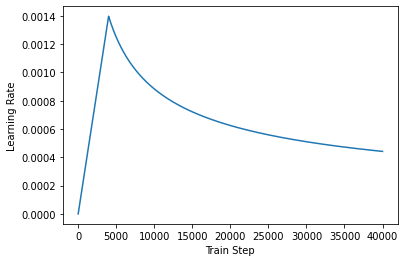

In [58]:
temp_learning_rate_schedule = CustomSchedule(d_model)

plt.plot(temp_learning_rate_schedule(tf.range(40000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

## Loss and metrics

대상 시퀀스는 패딩되므로 손실을 계산할 때 패딩 마스크를 적용하는 것이 중요합니다.

In [59]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [60]:
def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask
  
  return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

In [61]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(
    name='train_accuracy')

## Training and checkpointing

In [62]:
transformer = Transformer(num_layers, d_model, num_heads, dff,
                          input_vocab_size, target_vocab_size, 
                          pe_input=input_vocab_size, 
                          pe_target=target_vocab_size,
                          rate=dropout_rate)

In [63]:
def create_masks(inp, tar):
  # Encoder padding mask
  enc_padding_mask = create_padding_mask(inp)
  
  # Used in the 2nd attention block in the decoder.
  # This padding mask is used to mask the encoder outputs.
  dec_padding_mask = create_padding_mask(inp)
  
  # Used in the 1st attention block in the decoder.
  # It is used to pad and mask future tokens in the input received by 
  # the decoder.
  look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
  dec_target_padding_mask = create_padding_mask(tar)
  combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
  
  return enc_padding_mask, combined_mask, dec_padding_mask

체크포인트 경로 및 체크포인트 관리자를 만듭니다. 이 값은 `n` 번 마다 체크포인트를 저장하는 데 사용됩니다.

In [64]:
checkpoint_path = "./checkpoints/train"

ckpt = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print ('Latest checkpoint restored!!')

대상은 `tar_inp`와 `tar_real`로 나뉘며 
 - `tar_inp`는 디코더에 입력으로 전달됩니다.
 - ` tar_real`은 같은 입력이 1만큼 이동되는 것
  - tar_input의 각 위치에서 tar_real은 예측해야 할 다음 토큰을 포함한다.

예컨대 `sentence` = "SOS A lion in the jungle is sleeping EOS"

 - tar_inp = SOS 정글의 사자가 자고 있다

 - tar_real = 정글의 사자가 자고 있다 EOS

transformer는 auto-regressive model입니다. 한 번에 한 부분씩 예측을 하고 지금까지의 출력을 사용하여 다음에 무엇을 할지 결정합니다. 

교육 동안 이 예제는 [text generation tutorial](.text_generation.ipynb)와 같이teacher-forcing을 사용합니다. Teacher forcing은 현재 시간 단계에서 모델이 예측하는 것과 상관없이 다음 시간 단계로 실제 결과를 전달하는 것입니다.

 transformer가 각 단어를 예측함에 따라 *self-attention*을 통해 입력 시퀀스의 이전 단어를 확인하여 다음 단어를 더 잘 예측할 수 있습니다.

모델이 예상 출력을 훔쳐보는 것을 방지하기 위해 모델은 look-ahead mask를 사용합니다.



In [65]:
EPOCHS = 20

In [66]:
# The @tf.function trace-compiles train_step into a TF graph for faster
# execution. The function specializes to the precise shape of the argument
# tensors. To avoid re-tracing due to the variable sequence lengths or variable
# batch sizes (the last batch is smaller), use input_signature to specify
# more generic shapes.

train_step_signature = [
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
]

@tf.function(input_signature=train_step_signature)
def train_step(inp, tar):
  tar_inp = tar[:, :-1]
  tar_real = tar[:, 1:]
  
  enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)
  
  with tf.GradientTape() as tape:
    predictions, _ = transformer(inp, tar_inp, 
                                 True, 
                                 enc_padding_mask, 
                                 combined_mask, 
                                 dec_padding_mask)
    loss = loss_function(tar_real, predictions)

  gradients = tape.gradient(loss, transformer.trainable_variables)    
  optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
  
  train_loss(loss)
  train_accuracy(tar_real, predictions)

포르투갈어는 입력 언어로 사용되며 영어는 대상 언어입니다.

In [67]:
for epoch in range(EPOCHS):
  start = time.time()
  
  train_loss.reset_states()
  train_accuracy.reset_states()
  
  # inp -> portuguese, tar -> english
  for (batch, (inp, tar)) in enumerate(train_dataset):
    train_step(inp, tar)
    
    if batch % 50 == 0:
      print ('Epoch {} Batch {} Loss {:.4f} Accuracy {:.4f}'.format(
          epoch + 1, batch, train_loss.result(), train_accuracy.result()))
      
  if (epoch + 1) % 5 == 0:
    ckpt_save_path = ckpt_manager.save()
    print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
                                                         ckpt_save_path))
    
  print ('Epoch {} Loss {:.4f} Accuracy {:.4f}'.format(epoch + 1, 
                                                train_loss.result(), 
                                                train_accuracy.result()))

  print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 9.0405 Accuracy 0.0000
Epoch 1 Batch 50 Loss 8.9720 Accuracy 0.0003
Epoch 1 Batch 100 Loss 8.8708 Accuracy 0.0125
Epoch 1 Batch 150 Loss 8.7628 Accuracy 0.0175
Epoch 1 Batch 200 Loss 8.6335 Accuracy 0.0200
Epoch 1 Batch 250 Loss 8.4769 Accuracy 0.0225
Epoch 1 Batch 300 Loss 8.2986 Accuracy 0.0267
Epoch 1 Batch 350 Loss 8.1120 Accuracy 0.0301
Epoch 1 Batch 400 Loss 7.9309 Accuracy 0.0329
Epoch 1 Batch 450 Loss 7.7670 Accuracy 0.0358
Epoch 1 Batch 500 Loss 7.6221 Accuracy 0.0388
Epoch 1 Batch 550 Loss 7.4891 Accuracy 0.0419
Epoch 1 Batch 600 Loss 7.3634 Accuracy 0.0452
Epoch 1 Batch 650 Loss 7.2435 Accuracy 0.0487
Epoch 1 Batch 700 Loss 7.1284 Accuracy 0.0521
Epoch 1 Loss 7.1240 Accuracy 0.0522
Time taken for 1 epoch: 173.9676730632782 secs

Epoch 2 Batch 0 Loss 5.4745 Accuracy 0.0991
Epoch 2 Batch 50 Loss 5.4632 Accuracy 0.1033
Epoch 2 Batch 100 Loss 5.4241 Accuracy 0.1054
Epoch 2 Batch 150 Loss 5.3701 Accuracy 0.1084
Epoch 2 Batch 200 Loss 5.3274 Accuracy 0.1106
Ep

## Evaluate


다음 단계는 평가에 사용됩니다.

* 포르투갈어 토큰라이저('`tokenizer_pt`')를 사용하여 입력 문장을 인코딩합니다. 또한 시작 토큰과 종료 토큰을 추가하여 입력이 모델이 학습된 것과 동일하도록 합니다. 이것이 인코더 입력입니다.

* 디코더 입력은 '`시작 토큰 == 토큰나이저_en.vocab_size`'입니다.

* padding masks와 look ahead masks를 계산합니다.

* 그런 다음 '`디코더`'는 '`encoder output`'과 자체 출력물(self-attention)을 보고 예측을 출력한다.

* 마지막 단어를 선택하고 argmax를 계산합니다.

* 예측된 단어를 디코더 입력에 합성하여 디코더에 전달합니다.

* 이 접근법에서 디코더는 예측한 이전 단어를 기반으로 다음 단어를 예측합니다.

참고: 여기에 사용되는 모델은 예제를 비교적 빠르게 유지할 수 있는 용량이 적으므로 예측이 정확하지 않을 수 있습니다. 본 문서에 결과를 재현하려면 위의 하이퍼 파라미터를 변경하여 전체 데이터 세트 및 기본 트랜스포머 모델 또는 트랜스포머 XL을 사용하십시오.

In [68]:
def evaluate(inp_sentence):
  start_token = [tokenizer_pt.vocab_size]
  end_token = [tokenizer_pt.vocab_size + 1]
  
  # inp sentence is portuguese, hence adding the start and end token
  # inp 문장은 포르투갈어이므로 시작 토큰과 끝 토큰을 추가합니다.
  inp_sentence = start_token + tokenizer_pt.encode(inp_sentence) + end_token
  encoder_input = tf.expand_dims(inp_sentence, 0)
  
  # as the target is english, the first word to the transformer should be the
  # english start token.
  # 타겟이 영어이므로, 트랜스포머의 첫 번째 단어가 되어야 한다.
  # 영어 시작 토큰.
  decoder_input = [tokenizer_en.vocab_size]
  output = tf.expand_dims(decoder_input, 0)
    
  for i in range(MAX_LENGTH):
    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(
        encoder_input, output)
  
    # predictions.shape == (batch_size, seq_len, vocab_size)
    predictions, attention_weights = transformer(encoder_input, 
                                                 output,
                                                 False,
                                                 enc_padding_mask,
                                                 combined_mask,
                                                 dec_padding_mask)
    
    # select the last word from the seq_len dimension
    predictions = predictions[: ,-1:, :]  # (batch_size, 1, vocab_size)

    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
    
    # return the result if the predicted_id is equal to the end token
    if predicted_id == tokenizer_en.vocab_size+1:
      return tf.squeeze(output, axis=0), attention_weights
    
    # concatentate the predicted_id to the output which is given to the decoder
    # as its input.
    output = tf.concat([output, predicted_id], axis=-1)

  return tf.squeeze(output, axis=0), attention_weights

In [69]:
def plot_attention_weights(attention, sentence, result, layer):
  fig = plt.figure(figsize=(16, 8))
  
  sentence = tokenizer_pt.encode(sentence)
  
  attention = tf.squeeze(attention[layer], axis=0)
  
  for head in range(attention.shape[0]):
    ax = fig.add_subplot(2, 4, head+1)
    
    # plot the attention weights
    ax.matshow(attention[head][:-1, :], cmap='viridis')

    fontdict = {'fontsize': 10}
    
    ax.set_xticks(range(len(sentence)+2))
    ax.set_yticks(range(len(result)))
    
    ax.set_ylim(len(result)-1.5, -0.5)
        
    ax.set_xticklabels(
        ['<start>']+[tokenizer_pt.decode([i]) for i in sentence]+['<end>'], 
        fontdict=fontdict, rotation=90)
    
    ax.set_yticklabels([tokenizer_en.decode([i]) for i in result 
                        if i < tokenizer_en.vocab_size], 
                       fontdict=fontdict)
    
    ax.set_xlabel('Head {}'.format(head+1))
  
  plt.tight_layout()
  plt.show()

In [70]:
def translate(sentence, plot=''):
  result, attention_weights = evaluate(sentence)
  
  predicted_sentence = tokenizer_en.decode([i for i in result 
                                            if i < tokenizer_en.vocab_size])  

  print('Input: {}'.format(sentence))
  print('Predicted translation: {}'.format(predicted_sentence))
  
  if plot:
    plot_attention_weights(attention_weights, sentence, result, plot)

In [71]:
translate("este é um problema que temos que resolver.")
print ("Real translation: this is a problem we have to solve .")

Input: este é um problema que temos que resolver.
Predicted translation: this is a problem that we have to deal with .
Real translation: this is a problem we have to solve .


In [72]:
translate("os meus vizinhos ouviram sobre esta ideia.")
print ("Real translation: and my neighboring homes heard about this idea .")

Input: os meus vizinhos ouviram sobre esta ideia.
Predicted translation: my neighbors have heard about this idea .
Real translation: and my neighboring homes heard about this idea .


In [73]:
translate("vou então muito rapidamente partilhar convosco algumas histórias de algumas coisas mágicas que aconteceram.")
print ("Real translation: so i 'll just share with you some stories very quickly of some magical things that have happened .")

Input: vou então muito rapidamente partilhar convosco algumas histórias de algumas coisas mágicas que aconteceram.
Predicted translation: so i 'm going to go through a quick story of some magic things that have happened .
Real translation: so i 'll just share with you some stories very quickly of some magical things that have happened .



디코더의 여러 레이어 및 attention blocks을 `plot` 파라미터로 전달할 수 있습니다.

Input: este é o primeiro livro que eu fiz.
Predicted translation: this is the first book i did.. i said


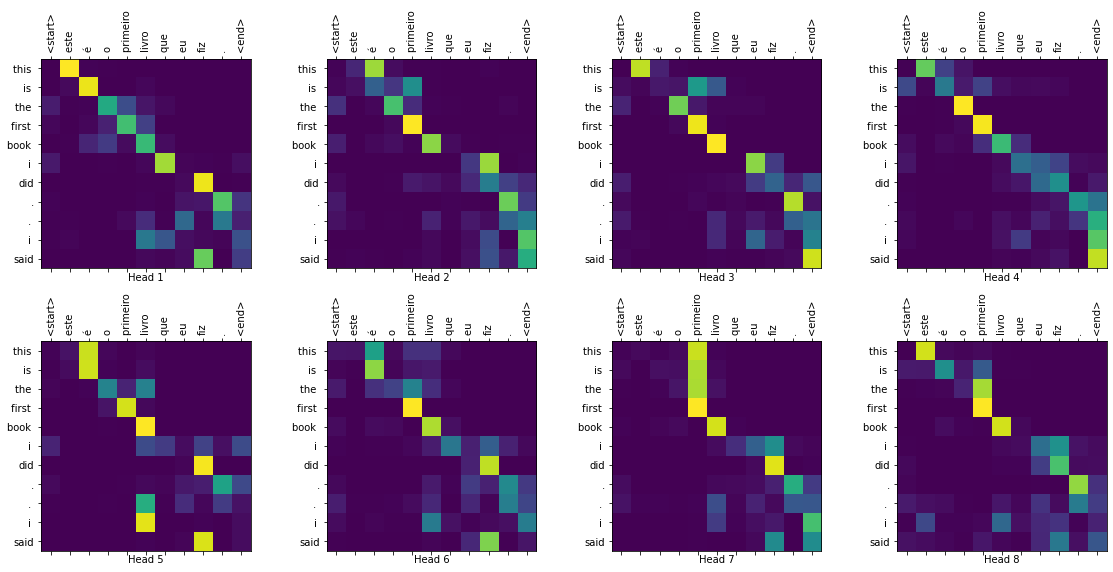

Real translation: this is the first book i've ever done.


In [74]:
translate("este é o primeiro livro que eu fiz.", plot='decoder_layer4_block2')
print ("Real translation: this is the first book i've ever done.")

다른 데이터 집합을 사용하여 transformer를 교육해 보십시오.<br> 위의 하이퍼 파라미터를 변경하여 기본 transformer를 또는 transformer를 XL을 만들 수도 있습니다.<br> 또한 여기에 정의된 레이어를 사용하여 BERT를 작성하고 최신 모델을 교육할 수 있습니다.<br> 또한 빔 검색을 구현하여 더 나은 예측을 얻을 수 있습니다.

## 요약

이 튜토리얼에서는 positional encoding,  multi-head attention, masking의 중요성 및 transformer 생성 방법에 대해 배웠습니다.

다른 데이터 집합을 사용하여 transformer 를 교육해 보십시오. 위의 하이퍼 파라미터를 변경하여 기본transformer  또는 transformer XL을 만들 수도 있습니다. 여기에 정의된 레이어를 사용하여 [BERT](https://arxiv.org/abs/1810.04805)를 만들고 최신 모델을 교육할 수도 있습니다. 또한 beam search을 구현하여 더 나은 예측을 얻을 수 있습니다.